# Assignment 10

### GOAL
After Assignment 10, you should understand and be able to apply the following functions (in addition to the ones from previous assignments):
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

## Exercises 

***Ex1*** Load the data by running
```python
from sklearn.datasets import make_blobs
import pandas as pd
data = pd.DataFrame(make_blobs(n_samples=50, n_features=2, centers=5, random_state=10, cluster_std=0.5)[0])
```

In [69]:
from sklearn.datasets import make_blobs
import pandas as pd
data = pd.DataFrame(make_blobs(n_samples=50, n_features=2, centers=5, random_state=10, cluster_std=0.5)[0])

***Ex2*** Plot the 'data' using a scatter plot (see below)
![https://i.ibb.co/P1F8VKR/download-3.png](https://i.ibb.co/P1F8VKR/download-3.png)

<AxesSubplot:xlabel='0', ylabel='1'>

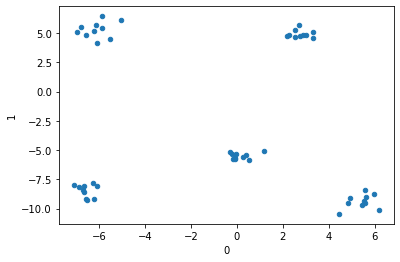

In [70]:
data.plot.scatter(0,1)

***Ex3*** Choose 5 initialization points (for kmeans) using a Forgy strategy. Plot the initialization points (using large red crosses) and plot them on a scatter chart along with the 'data' (see below)

![https://i.ibb.co/FJF3b2v/download-1.png](https://i.ibb.co/FJF3b2v/download-1.png)

<AxesSubplot:xlabel='0', ylabel='1'>

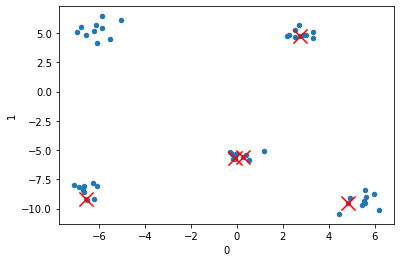

In [71]:
initialization_points = data.sample(5)
ax = data.plot.scatter(0,1)
initialization_points.plot.scatter(0,1, ax=ax, marker='x', s=200, color='red')

***Ex4*** Choose 5 initialization points (for kmeans) using the Kmeans++ strategy. Plot the initialization points (using large red crosses) and plot them on a scatter chart along with the 'data' (similar to Ex3). Hint: Sample has a parameter 'weight'. Hint2: Use [pairwise.euclidean_distances](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.euclidean_distances.html) to calculate the distance between all points at once.

Kmeans++ strategy (from slides):
1. Choose a point from the data (i.e., Forgy)
2. For each data point x not chosen yet, compute D(x), the distance between x and the nearest center that has already been chosen.
4. Choose one new data point at random with probability proportional to 𝐷(𝑥)^2
5. Repeat Steps 2 and 3 until k centers have been chosen.

In [72]:
CLOSEST_DIS = distanceMatrix.loc[data.sample(2).index.tolist(),:].min()

prob = CLOSEST_DIS.pow(2)
prob = prob / prob.sum()
prob

0     0.054221
1     0.000351
2     0.000153
3     0.036166
4     0.000049
5     0.000000
6     0.052118
7     0.000000
8     0.000493
9     0.000050
10    0.000103
11    0.000022
12    0.000016
13    0.035522
14    0.049249
15    0.052788
16    0.000453
17    0.000040
18    0.034537
19    0.000067
20    0.000044
21    0.013737
22    0.038560
23    0.011321
24    0.057151
25    0.051469
26    0.035479
27    0.048432
28    0.035990
29    0.011524
30    0.000081
31    0.038643
32    0.035326
33    0.013665
34    0.012754
35    0.000107
36    0.000060
37    0.041641
38    0.017467
39    0.042311
40    0.013267
41    0.034790
42    0.000417
43    0.010732
44    0.049888
45    0.000042
46    0.012962
47    0.013475
48    0.042206
49    0.000060
dtype: float64

<AxesSubplot:xlabel='0', ylabel='1'>

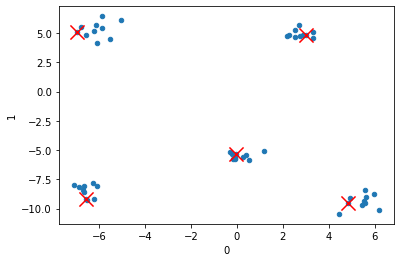

In [73]:
from sklearn.metrics.pairwise import euclidean_distances

# Calculate the distance between all the points at once
distanceMatrix = pd.DataFrame(euclidean_distances(data))

# Choose a point from the data (add the index in the initialization point)
initialization_points_index = data.sample(1).index.tolist()

while len(initialization_points_index) != 5:
    distance_to_initialization_points = distanceMatrix.loc[initialization_points_index,:]
    closest_distance = distance_to_initialization_points.min()
    # Note: Points that are already in distance_to_initialization_points cannot 
    # be selected again because the distance is zero so will be the prob.
    prob = closest_distance.pow(2)
    prob = prob / prob.sum()
    initialization_points_index.extend(data.sample(1, weights=prob).index.tolist())
    
initialization_points = data.loc[initialization_points_index,:]
ax = data.plot.scatter(0,1)
initialization_points.plot.scatter(0,1, ax=ax, marker='x', s=200, color='red')

***Ex5*** Load the data marketing_campaign.csv. More information about the dataset can be found here: https://www.kaggle.com/imakash3011/customer-personality-analysis. Hint: this dataset is not using commas but tabulations to separate the columns.

In [74]:
df = pd.read_csv('marketing_campaign.csv', sep='	')

***Ex6*** The shop owner would like to get clusters of similar customers using the following columns:
```python
columns_to_keep = ['Year_Birth', 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
```

Here are the steps to follow:
1. Scale all the values from 0 to 1 and remove lines with empty values
2. Using Kmeans, try various values of k (from 15 to 40) and select the one that maximizes the silhouette mean
3. Present some summary statistics for each cluster to the shop owner

In [75]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

columns_to_keep = ['Year_Birth', 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'] 
df = df.loc[:,columns_to_keep]

# Remove missing values
print (df.shape)
df = df.loc[df.isnull().sum(axis=1)==0,:]
print (df.shape, 'after removing nan')

# Scale values from 0 to 1
df_scaled =  (df - df.min()) / (df.max() - df.min())

# Try various values of k
sil_scores = []
for k in range(10,20):
    clusterer = KMeans(n_clusters=k)
    clusterer.fit(df_scaled)
    label = clusterer.predict(df_scaled)
    sil_scores.append({'k':k, 'silhouette_score':silhouette_score(df_scaled, label), 'label':label})

# Select best labels (based on silhouette score)
sil_scores = pd.DataFrame(sil_scores)
best_label = sil_scores.loc[sil_scores['silhouette_score'].idxmax(),'label']
best_label

# Present some summary statistics for each clusters
df.groupby(best_label).mean()

(2240, 10)
(2216, 10) after removing nan


,Year_Birth,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,1978.268781,32101.278798,22.140234,4.524207,17.784641,6.554257,4.545910,1.851419,0.404007,2.889816
1,1969.596774,77229.645161,1002.096774,29.709677,505.419355,77.838710,54.290323,5.419355,5.983871,10.500000
2,1973.674419,75083.883721,466.162791,78.720930,540.372093,202.232558,37.534884,4.441860,6.372093,6.139535
3,1963.739394,57816.800000,442.672727,9.351515,101.212121,13.430303,11.272727,6.957576,2.466667,7.769697
4,1967.377358,67007.971698,392.594340,56.981132,289.584906,46.735849,43.273585,5.622642,4.273585,11.349057
5,1971.959184,78735.755102,930.918367,119.408163,601.244898,63.959184,70.040816,5.734694,6.122449,8.959184
6,1963.557692,65134.509615,839.701923,17.884615,176.403846,19.423077,16.153846,5.903846,4.413462,10.971154
7,1966.353448,57663.862069,185.620690,37.215517,206.836207,54.603448,33.189655,4.543103,3.405172,6.310345
8,1971.063492,74163.349206,466.904762,40.158730,424.746032,57.825397,142.253968,6.253968,5.174603,8.111111
9,1966.468085,74701.617021,372.489362,151.893617,407.276596,65.787234,97.659574,5.127660,5.276596,7.510638


***Ex7*** Despite the summary statistics, extracting key insights about each group of customers is challenging. Can you envision how decision trees could help to explain the various clusters?

In [76]:
#This is an open question